In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
libros1 = pd.read_csv('amazon-books.txt', delimiter = "\t")
libros1

,Title,Author,List Price,Amazon Price,Hard/ Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight (oz)
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,0061564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,0307265722,8.0,5.2,1.4,22.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,9.3,6.6,1.1,24.0
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,9.1,6.1,0.7,8.0
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,8.0,5.4,0.7,6.4
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,10.7,8.9,0.9,14.4


In [4]:
libros=libros1.iloc[:,[2,3,4,5,7]]
#Pubyear=libros['Pub year']
libros['PubYear']=libros['Pub year']
libros['AmazonPrice']=libros['Amazon Price']
libros['ListPrice']=libros['List Price']
libros['Hard/Paper']=libros['Hard/ Paper']
libros=libros.drop(['Pub year'],axis=1)
libros=libros.drop(['Amazon Price'],axis=1)
libros=libros.drop(['List Price'],axis=1)
libros=libros.drop(['Hard/ Paper'],axis=1)
libros

<ipython-input-4-4c74e37f85f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libros['PubYear']=libros['Pub year']
<ipython-input-4-4c74e37f85f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libros['AmazonPrice']=libros['Amazon Price']
<ipython-input-4-4c74e37f85f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,NumPages,PubYear,AmazonPrice,ListPrice,Hard/Paper
0,304.0,2010.0,5.18,12.95,P
1,273.0,2008.0,10.20,15.00,P
2,96.0,1995.0,1.50,1.50,P
3,672.0,2008.0,10.87,15.99,P
4,720.0,2011.0,16.77,30.50,P
...,...,...,...,...,...
320,192.0,2004.0,12.24,18.99,H
321,160.0,2011.0,27.55,27.55,P
322,224.0,2005.0,5.18,12.95,P
323,480.0,2010.0,97.50,97.50,P


In [5]:
libros.columns

Index(['NumPages', 'PubYear', 'AmazonPrice', 'ListPrice', 'Hard/Paper'], dtype='object')

In [6]:
libros['NumPages']=libros['NumPages'].fillna(libros.NumPages.mean())
libros['PubYear']=libros['PubYear'].fillna(libros.PubYear.median())

libros['NumPages']=libros['NumPages'].astype(int)
libros['PubYear']=libros['PubYear'].astype(int)
libros.dtypes

NumPages         int32
PubYear          int32
AmazonPrice    float64
ListPrice      float64
Hard/Paper      object
dtype: object

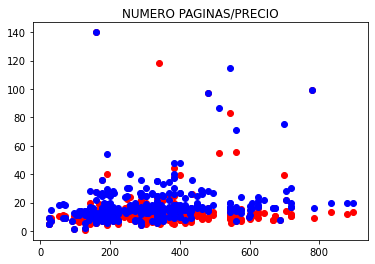

In [7]:
plt.title("NUMERO PAGINAS/PRECIO")
plt.scatter(libros['NumPages'],libros['AmazonPrice'],color='red')
plt.scatter(libros['NumPages'],libros['ListPrice'],color='blue')
plt.show()

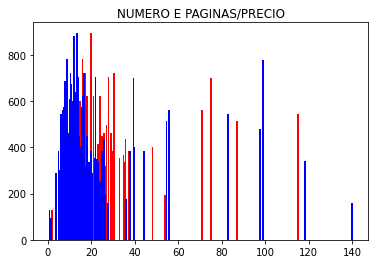

In [8]:
plt.title("NUMERO DE PAGINAS/PRECIO")
plt.bar(libros['ListPrice'],libros['NumPages'],color='red')
plt.bar(libros['AmazonPrice'],libros['NumPages'],color='blue')
plt.show()

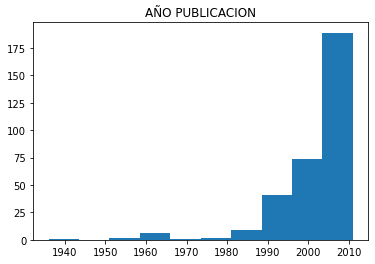

In [9]:
plt.title("AÑO PUBLICACION")
plt.hist(libros['PubYear'])
plt.show()

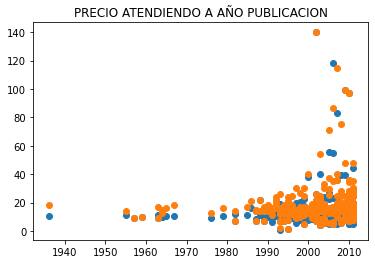

In [10]:
plt.title("PRECIO ATENDIENDO A AÑO PUBLICACION")
plt.scatter(libros['PubYear'],libros['AmazonPrice'])
plt.scatter(libros['PubYear'],libros['ListPrice'])
plt.show()


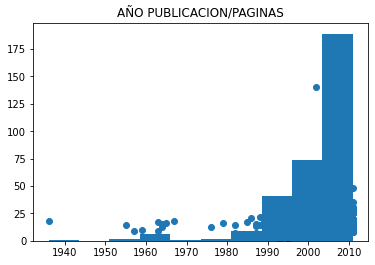

In [11]:
plt.title("AÑO PUBLICACION/PAGINAS")
plt.hist(libros['PubYear'])
plt.scatter(libros['PubYear'],libros['ListPrice'])#añadir color diferente
plt.show()

#pie publicacion años

In [12]:
libros

,NumPages,PubYear,AmazonPrice,ListPrice,Hard/Paper
0,304,2010,5.18,12.95,P
1,273,2008,10.20,15.00,P
2,96,1995,1.50,1.50,P
3,672,2008,10.87,15.99,P
4,720,2011,16.77,30.50,P
...,...,...,...,...,...
320,192,2004,12.24,18.99,H
321,160,2011,27.55,27.55,P
322,224,2005,5.18,12.95,P
323,480,2010,97.50,97.50,P


In [13]:
librosHP = libros['Hard/Paper'] == 'H'
librosHP.value_counts()
# True= H, False= P

False    236
True      89
Name: Hard/Paper, dtype: int64

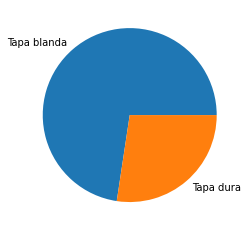

In [14]:
num = [236,89]
nombres = ["Tapa blanda","Tapa dura"]
plt.pie(num, labels=nombres)
plt.show()

In [21]:
ejemplares= libros.groupby('PubYear').count()
ejemplares

,NumPages,AmazonPrice,ListPrice,Hard/Paper
PubYear,,,,
1936,1,1,1,1
1955,1,1,1,1
1957,1,1,1,1
1959,1,1,1,1
1963,2,2,2,2
1964,2,2,2,2
1965,1,1,1,1
1967,1,1,1,1
1976,1,1,1,1


In [16]:
PUByE

NameError: name 'PUByE' is not defined